<a href="https://colab.research.google.com/github/jsalafica/Data-Science-I/blob/master/ProyectoDS_ParteI_Salafica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Proyecto Data Science - Parte I - Javier Salafica

# 📌 Abstract

El presente proyecto tiene como objetivo analizar los accidentes de tránsito ocurridos en la ciudad de Nueva York durante el año 2020, utilizando un dataset público que contiene información detallada de cada siniestro, incluyendo fecha, hora, ubicación, cantidad de heridos y fallecidos, tipo de vehículos involucrados, y factores contribuyentes al accidente.

El análisis busca explorar los patrones temporales, geográficos y causales de los accidentes, con el fin de identificar posibles factores de riesgo y proponer líneas de trabajo para la prevención. El año 2020 presenta además particularidades en el contexto de la pandemia por COVID-19, que alteró significativamente los hábitos de movilidad urbana, permitiendo también observar eventuales cambios en la dinámica de los siniestros viales.

A través de análisis exploratorios y visualizaciones multivariadas, se intentará responder preguntas de investigación relacionadas a la distribución de accidentes por municipio, su severidad, los factores más frecuentes que contribuyen a los siniestros, y la interacción entre el horario y el tipo de vehículo involucrado. Finalmente, se identificarán patrones relevantes y valores faltantes presentes en los datos, como primer paso para futuros modelos predictivos o descriptivos en seguridad vial.



#❓Preguntas e hipótesis

1. ¿En qué Municipio de NYC ocurren más accidentes? (Hipótesis: Brooklyn y Bronx concentran más accidentes por su densidad de tránsito)
2. ¿Qué horarios concentran más accidentes? (Hipótesis: Horas pico)
3. ¿Qué tipo de vehículo está más involucrado? (Hipótesis: Sedanes)
4. ¿Cuáles son los factores contribuyentes más frecuentes? (Hipótesis: Driver inattention y Unspecified)
5. ¿Existe relación entre tipo de vehículo y cantidad de heridos?


#📊 Visualizaciones y Análisis

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSV desde GitHub directamente
url = 'https://raw.githubusercontent.com/jsalafica/Data-Science-I/master/NYC_Accidents_2020.csv'
df = pd.read_csv(url)

print(df.shape)
df.head()


(74881, 29)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


##Missing Values


In [2]:

# Tipos de datos
print(df.dtypes)

# Valores faltantes
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

# Estadísticas básicas
print(df.describe())


CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

##📈 1. Análisis Univariado

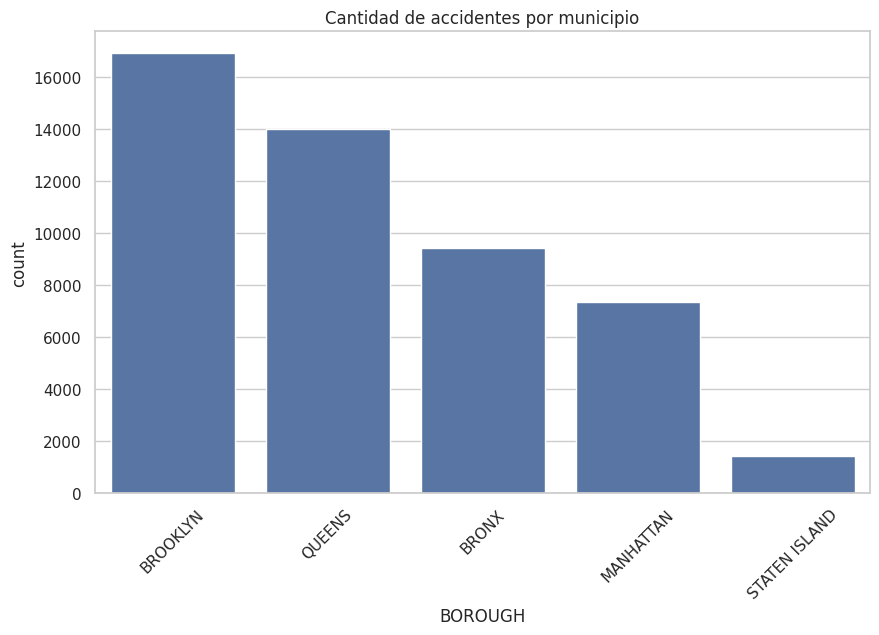

In [7]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cantidad de accidentes por municipio
plt.figure(figsize=(10,6))
sns.countplot(x='BOROUGH', data=df, order=df['BOROUGH'].value_counts().index)
plt.title("Cantidad de accidentes por municipio")
plt.xticks(rotation=45)
plt.show()

##🔀 2. Análisis Bivariado

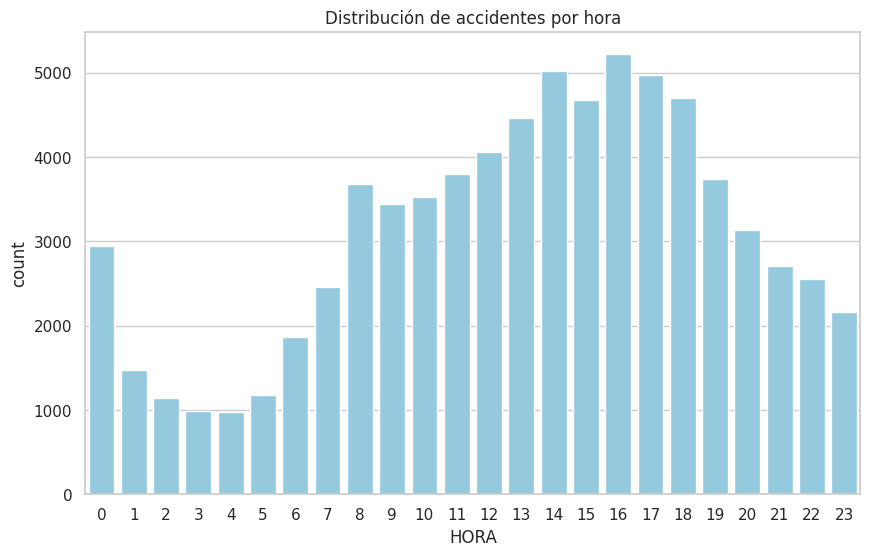

In [5]:
# Distribución de accidentes por hora
df['HORA'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M:%S', errors='coerce').dt.hour
plt.figure(figsize=(10,6))
sns.countplot(x='HORA', data=df, color='skyblue')
plt.title("Distribución de accidentes por hora")
plt.show()

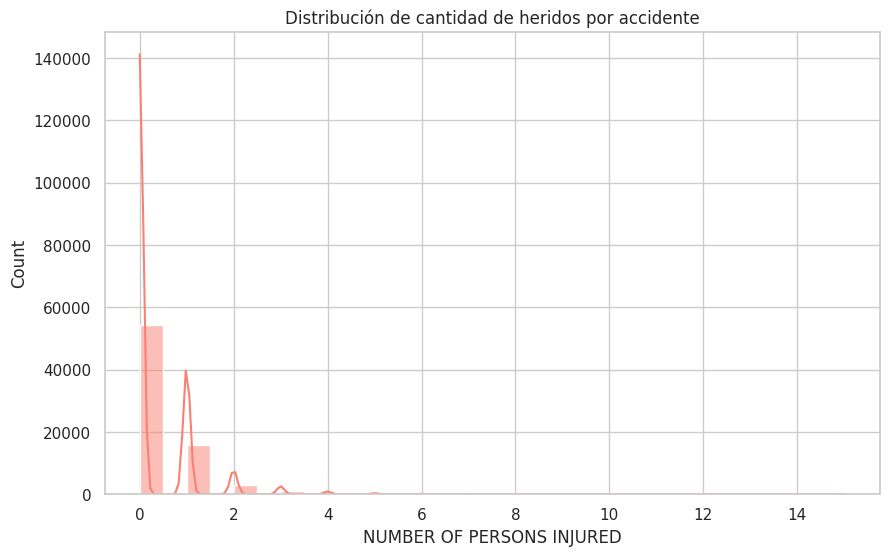

In [6]:
# Distribución de personas heridas
plt.figure(figsize=(10,6))
sns.histplot(df['NUMBER OF PERSONS INJURED'], bins=30, kde=True, color='salmon')
plt.title("Distribución de cantidad de heridos por accidente")
plt.show()

##🔁 3. Análisis Multivariado

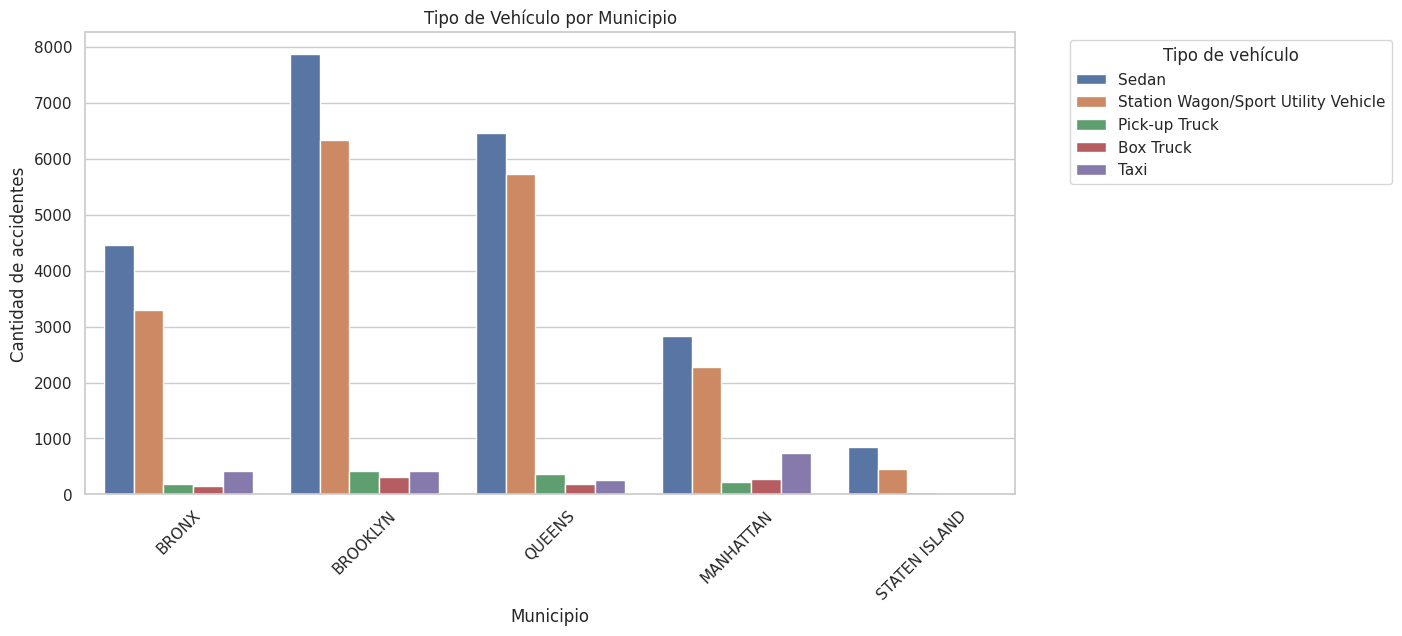

In [12]:

# Primero filtramos los municipios
top_boroughs = df['BOROUGH'].value_counts().head(5).index
df_top = df[df['BOROUGH'].isin(top_boroughs)]

# Ahora filtramos los 5 tipos de vehículos más frecuentes
top_vehicles = df['VEHICLE TYPE CODE 1'].value_counts().head(5).index
df_top = df_top[df_top['VEHICLE TYPE CODE 1'].isin(top_vehicles)]

# Graficamos el multivariado
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='BOROUGH', hue='VEHICLE TYPE CODE 1')
plt.title('Tipo de Vehículo por Municipio')
plt.xlabel('Municipio')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

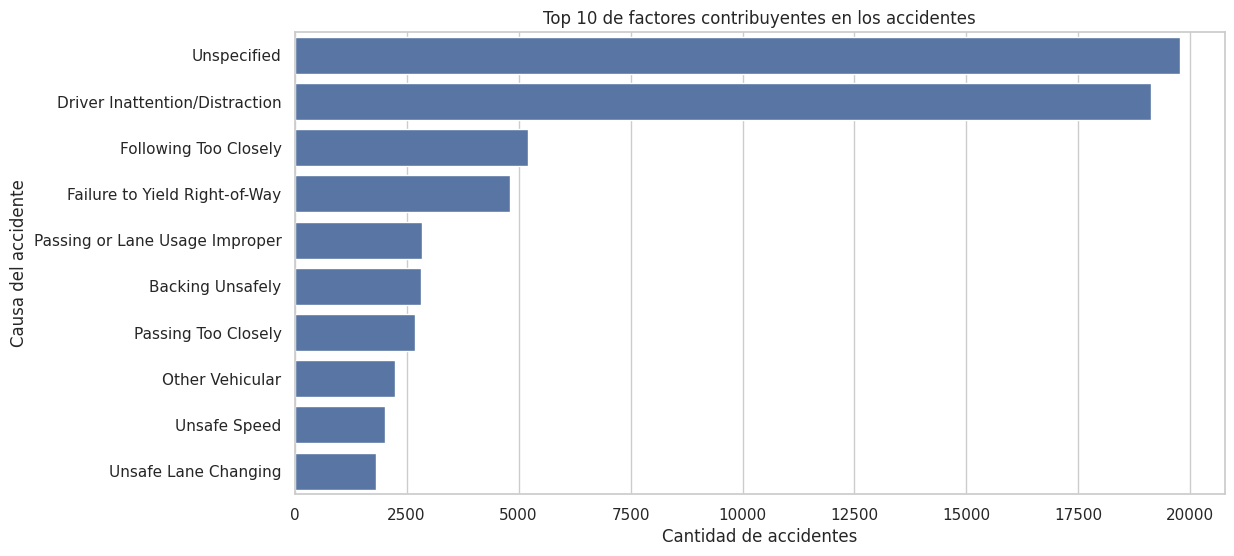

In [10]:
# Factores contribuyentes más frecuentes
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified')
plt.figure(figsize=(12,6))
top_causas = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(10)
sns.barplot(x=top_causas.values, y=top_causas.index)
plt.title("Top 10 de factores contribuyentes en los accidentes")
plt.xlabel("Cantidad de accidentes")
plt.ylabel("Causa del accidente")
plt.show()


#✅ Conclusiones preliminares

A partir del análisis exploratorio inicial del dataset de accidentes de tránsito de la ciudad de Nueva York (2020), se observan los siguientes hallazgos:

- Brooklyn y el Bronx concentran mayor cantidad de accidentes.
- Los accidentes se concentran durante la mañana y la tarde (horas pico).
- Los accidentes con muchos heridos son pocos; la mayoría tiene 0 a 2 heridos.
- Los Sedanes son el tipo de vehículo más involucrado.
- "Unspecified" y "Driver Inattention/Distraction" son los factores contribuyentes más frecuentes.
- Se observan algunos boroughs con más heridos cuando están involucrados vehículos como motocicletas o SUVs.

Este análisis inicial permite tener un panorama general de los accidentes y sentar bases para futuras etapas de modelado predictivo.
